# Oportunidades de negocio sobre creditos financieros de bajo riesgo

# Modelos analitico

## 1. Objetivo

El objetivo es crear un modelo de machine learning que pueda identificar las mejores opciones credito a un individuo por parte de entidades financieras

## 2. Contexto

Las entidades crediticia tienen 2 formas de generar ingresos: Por un lado es por los servicios otorgados y las comisiones y tasas de los productos que ofrece; y por otro lado por spread bancario, que no es mas que el margen de ganancias entre la tasa de interes activa y la tasa de interes pasiva que las entidades financieras aplican en sus procesos regulares. El interes activo es lo que cobra la entidad de interés en razon de prestamo o servicios como plazo fijo; mientras que el interes pasivo es la deuda que se le debe al cliente.
Las entidades financieras desean asegurar que los creditos que se otorgan, no terminen en mora.

## 3. Problema


Grandes companias financieras estan detectando un aumento de deudores y morosos en su cartera de clientes. El BCRA generó un aumento de subvencion de tasas de prestamo para los bancos, lo cual alento el otorgamiento masivo de prestamos. En la misma disposicion, aumento exponencialmente la tasa de Deudores y Morosos.
Se ha bajado un liniamiento de credito para los bancos; **"Ya no regalen prestamos"** nos dijeron. Sin embargo, las tasas subsidiadas suelen ser atractivas para los clientes; disminuye los morosos, y expande la economia. Se proveyo una base de datos para entrenar un algoritmo predictorio;

¿Que buscamos con nuestro analisis? Detectar prestatarios con poco riesgo, pero tambien, aumentar la cantidad de prestamos otorgados. Y para esto ultimo es necesario conectar con el perfil de personas que son mas atractivos para el negocio.
Usaremos a nuestro favor las variables economicas y comerciales que se nos otorgan, con el fin de predecir el perfil optimo de otorgamiento de los prestamos, y los mas propensos a aceptarlos.

## 4. Data adquisition (Adquisicion de datos)

In [ ]:
#Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn # Paquete base de ML
import plotly.express as px

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
url = "/content/drive/MyDrive/DataScience/proyecto/credito/bank.csv"
df = pd.read_csv(url,  delimiter=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Los datos que utilizaremos, por el momento, son todos los relevantes a

*   medidas: age, balance, duration, campaign, pdays, previous
*   dimensiones: job, marital, education, default, housing, loan, contact, day, month, poutcome, y.

## 5. EDA (Análisis Exploratorio de Datos):

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

**VARIABLES**

1. age: La edad del individuo.
2. job: El tipo de empleo o profesión del individuo.
3. marital: El estado civil del individuo.
4. education: El nivel de educación del individuo.
5. default: Indica si el individuo tiene un historial de incumplimiento de pagos o no. "No" significa que no ha incumplido, y "yes" significa que ha incumplido.
6. balance: El saldo medio anual en la cuenta bancaria del individuo.
7. housing: Indica si el individuo tiene una hipoteca o no.
8. loan: Indica si el individuo tiene un préstamo personal.
9. contact: El método de contacto utilizado para comunicarse con el individuo.
10. day: El día del mes en que se realizó el último contacto.
11. month: El mes en que se realizó el último contacto.
12. duration: La duración en segundos del último contacto.
13. campaign: El número de contactos realizados durante esta campaña.
14. pdays: El número de días que han pasado desde el último contacto anterior a esta campaña. Un valor de -1 indica que no se ha contactado previamente al individuo.
15. previous: El número de contactos realizados antes de esta campaña.
16. poutcome: El resultado de la campaña de marketing anterior, que puede ser "unknown" (desconocido), "failure" (fracaso), "other" (otro) o "success" (éxito).
17. y: Puede tener un significado general del analisis, como variable Y.

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


(4521, 17)

De las 17 columnas, y 4521 filas tenemos un total de 0 Null
El que no tenga 'non null', y que los tipos de datos esten bien identificados, nos facilita para el posterior analisis EDA

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<h4>  Insights <h4>

*   age: Vemos que la media y la mediana son consistentes; solo hay 2 años de diferencia, por lo que el grueso de las personas ya se encuentran en una edad adulta.
*   balance: hay una gran diferencia entre la media y la mediana, y mas en las diferenciaciones intercuartilicas. Esto puede deberse a los outliers, ya que de hecho, el maximo balane en fondos supera ampliamente al del ultimo cuartil.
*   duration: la duracion de la llamada puede ser relativa o contextual. Su outlier podria significar cualquier cosa. Haria falta un mapa de relacion para identificar su relevancia con la campaña.
*   pdays: resulta importante entender que la media es lo que nos dara a entender la cantidad de veces que fue contactado un cliente, ya que la mediana estara probablemente sobrepuesta por la moda, la cual es el no contacto, y esta plasmada en los intercuartiles.
*   previous: La media de contacto previo puede estar sesgada por los outliers.


In [ ]:
# Detectamos la moda
df.mode()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no


Identificamos asi:
1. La mayoria de potenciales prestatarios no fueron contactados en el pasado, ni en el momento.
2. La duracion del contacto tiene una relacion relativa cercana tanto en media, mediana y moda; lo cual nos indica un parametro.

In [ ]:
#Convertimos los meses en letra, en meses numericos:
meses_numericos = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Convertir los nombres de los meses a valores numéricos en la columna 'month'
df['month'] = df['month'].map(meses_numericos)

Hechamos un primer vistazo a algunos detalles de la encuesta

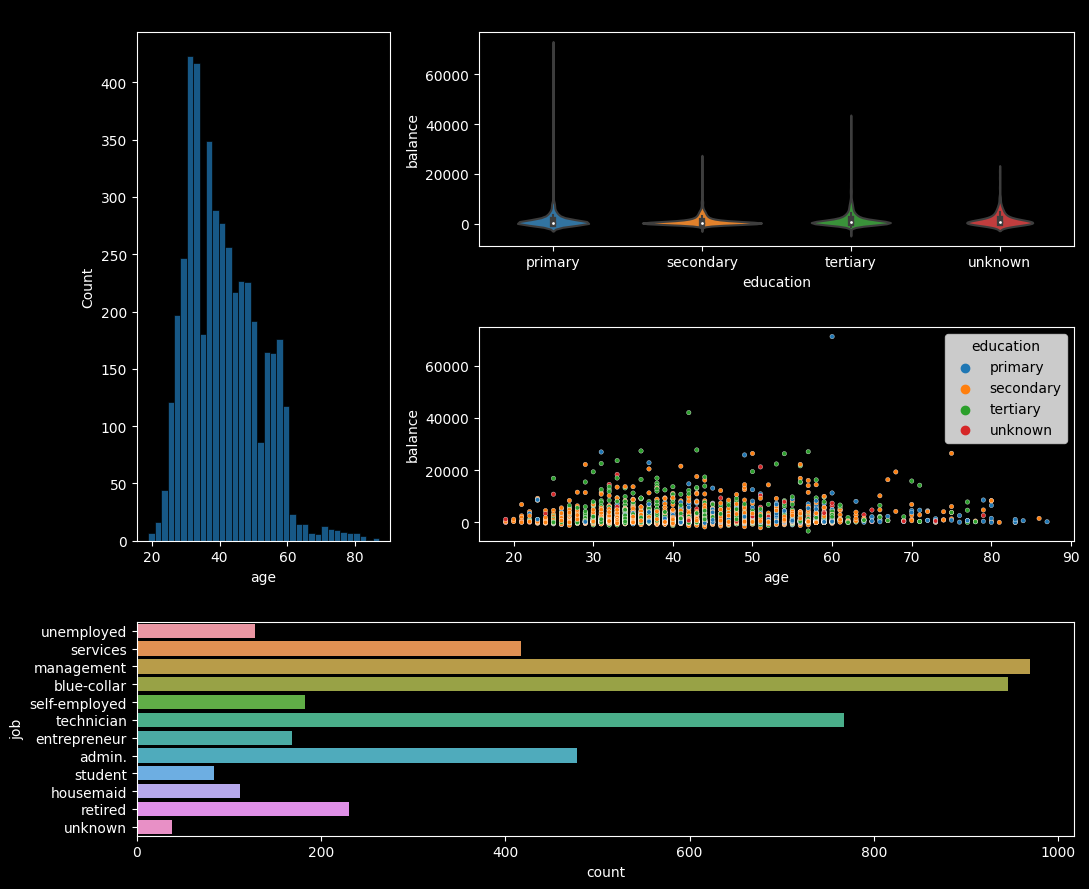

In [ ]:
#fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (15,10))
# Definir el mosaico
layout = """
ABB
ACC
DDD
"""
fig, ax = plt.subplot_mosaic(layout, figsize=(11, 9))
fig.set_facecolor('black')
# Dibujar gráficos en las subtramas correspondientes
sns.histplot(x='age', data=df, ax=ax['A']).set_title('Distribución de Edades')
sns.countplot(y=df['job'], ax=ax['D']).set_title('Distribución de Trabajos')
sns.violinplot(x='education', y='balance', data=df, ax=ax['B']).set_title('Distribución de Balance por Educación')
sns.scatterplot(x=df['age'], y=df['balance'], hue=df['education'], ax=ax['C'], s=10).set_title('Distribución de Balance por Edades')


for a in ax:
    ax[a].set_facecolor('black')
    ax[a].tick_params(axis='both', colors='white')
    ax[a].xaxis.label.set_color('white')
    ax[a].yaxis.label.set_color('white')
    ax[a].spines['top'].set_color('white')
    ax[a].spines['bottom'].set_color('white')
    ax[a].spines['left'].set_color('white')
    ax[a].spines['right'].set_color('white')


plt.tight_layout()
plt.show()

<h4>  Insights <h4>

* **recuadro 1 (conteo de edades)**: Vemos que se forma una campana de gauss donde la encuesta se concentra entre los 22 años y los 60. Sabremos asi que la concentracion de crédito se enfoca en un perfil de cliente, el cual tambien esta determinado por edades.
* **recuadro 2 y 3(educacion vs balance)**: Al extremo superior derecho encontramos el balance segun el nivel educativo, esto es importante porque el parametro segmenta a las personas según sus "capacidades"; aunque no en este caso. Vemos que no influye el nivel educativo de manera abrupta en los balances genérales. Hasta podemos encontrar un outlier en donde un nivel de educacion primario es con el que mayor poder adquisitivo cuenta.
* **Recuadro 4(conteo de empleo por encuestado)**: Encontramos que existen 3 tipos de empleados que son los que mas prestamos toman: management, blue-collar y technician. Este tipo de perfil es importante, porque sabremos adaptar mejor nuestra estrategia a un nicho limitado, y no generar variedades para abarcar todo.


Analicemos ahora los 4 parametros mas relevantes a consideracion para la desicion de la toma de credito: housing (credito hipotecario), loan (deuda), default (cesacion de pago) y education (educacion)

In [ ]:
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [ ]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

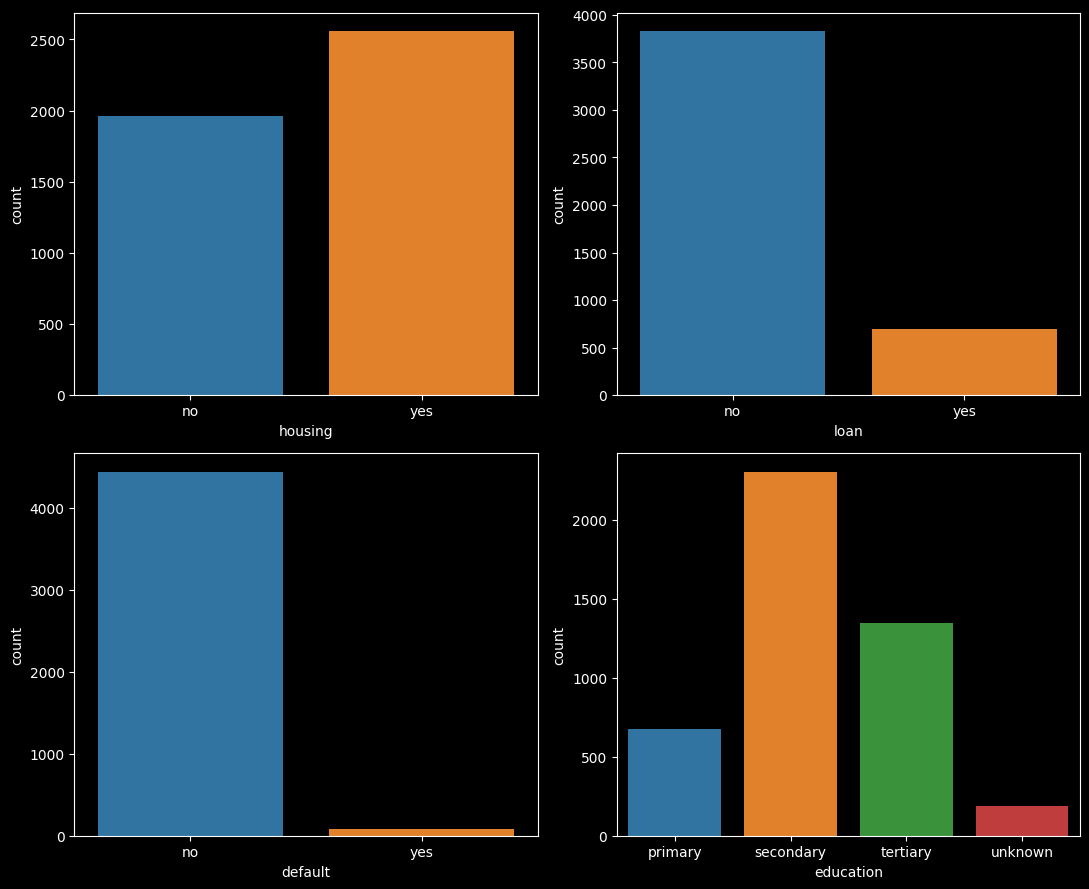

In [ ]:

layout2 = """
AB
CD
"""

fig, ax = plt.subplot_mosaic(layout2, figsize=(11, 9))
fig.set_facecolor('black')




sns.countplot(x='housing', data=df, ax=ax['A'])
sns.countplot(x='loan', data=df, ax=ax["B"])
sns.countplot(x='default', data=df, ax=ax["C"])
sns.countplot(x='education', data=df, ax=ax["D"])

for a in ax:
    ax[a].set_facecolor('black')
    ax[a].tick_params(axis='both', colors='white')
    ax[a].xaxis.label.set_color('white')
    ax[a].yaxis.label.set_color('white')
    ax[a].spines['top'].set_color('white')
    ax[a].spines['bottom'].set_color('white')
    ax[a].spines['left'].set_color('white')
    ax[a].spines['right'].set_color('white')

plt.tight_layout()
plt.show()

<h4>  Insights <h4>


Se ve que la mayoria de los contactados tienen hipoteca. Mientras que los individuos con creditos tomados son en proporcion mucho menor, y aquellos que cesaron el pago (o se atrasaron) se encuentran en una proporcion mínima. Predominan aquellos individuos que terminaron el secundario, y en segundo lugar el terciario, lo cual nos dice que para saber tomar credito (o tener el conocimiento del mismo) es necesario tener un nivel de educación basico. Por otro lado, el "unknown", el cual es desconocido, es minimo. Lo cual entendemos que para que se tome un tipo de credito, es necesario de base, tener un nivel educativo, por mas basico que sea.


<h3> ¿Cual es la relevancia de la educación en el conocimiento de creditos? </h3>

In [ ]:
unique_education = df['education'].unique()
print(unique_education)

['primary' 'secondary' 'tertiary' 'unknown']


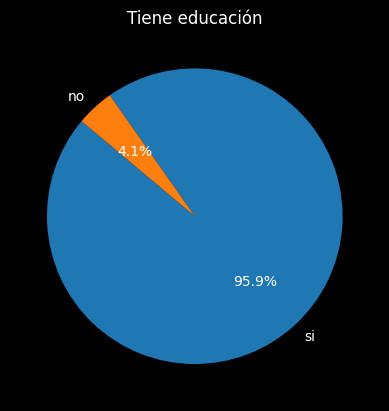

si    4334
no     187
Name: con_educacion, dtype: int64

In [ ]:
df_education = df.copy()
df_education['con_educacion'] = df_education['education'].apply(lambda x: 'no' if x == 'unknown' else 'si')


data = df_education['con_educacion'].value_counts()


fig, ax = plt.subplots()
ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140,  textprops={'color':"white"})

# Establecer el color de fondo del gráfico
fig.set_facecolor('black')
ax.set_facecolor('black')

plt.title('Tiene educación', color='white')
plt.show()

data

Vemos como principio la necesidad de educacion, por mas basica que sea, para tener conocimiento en la toma de credito, o sea factible para el mismo. Tambien tengamos en cuenta que 'unknow', no necesariamente significa que no tienen educacion, sino al contrario, tienen educacion superior, como carreras de grado o doctorado.

<h2> ¿Que relacion existe entre el exito del otorgamiento de credito y estas variables?</h2>

<ipython-input-64-d8338ec4aa0e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

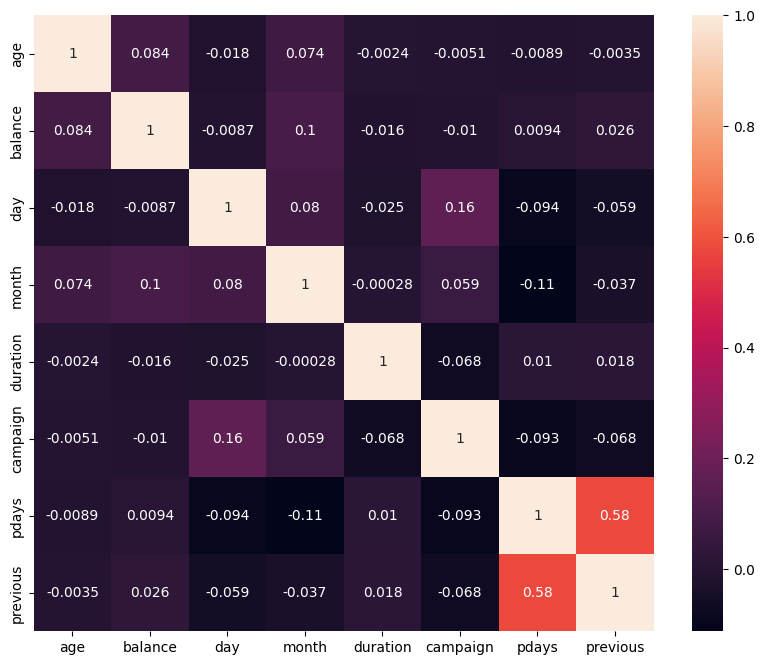

In [ ]:
# Mapa de relacion
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)


Las conexion mas fuerte la vemos en previous/pdays, y entre duration/y. La primera (probablemente) por que existe una relacion entre el "no contacto" y "la cantidad de contactos"; mientras que la segunda nos dice que la duracion del contacto se relaciona directamente con la concrecion de un credito.

## 6. Data Wrangling

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,no


#### Label encouder

In [ ]:
#aplicamos el one-hot encouder
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

df['job'] = lb.fit_transform(df['job'])
df['marital'] = lb.fit_transform(df['marital'])
df['education'] = lb.fit_transform(df['education'])
df['default'] = lb.fit_transform(df['default'])
df['housing'] = lb.fit_transform(df['housing'])
df['loan'] = lb.fit_transform(df['loan'])
df['contact'] = lb.fit_transform(df['contact'])
df['poutcome'] = lb.fit_transform(df['poutcome'])
df['y'] = lb.fit_transform(df['y'])


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,1,0,1787,0,0,1,19,10,79,1,-1,0,0,0
1,33,0,0,0,0,4789,1,1,1,11,5,220,1,339,4,1,0
2,35,0,0,0,0,1350,1,0,1,16,4,185,1,330,1,1,0
3,30,0,0,0,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,0,0,0,0,0,1,0,0,5,5,226,1,-1,0,0,0


## 7. Seleccion de algoritmos

In [ ]:
#Variables objetivo (Y) y resto de variables (X)
X = df.drop('y', axis=1)
y = df['y']

#### I. Arbol de desicion

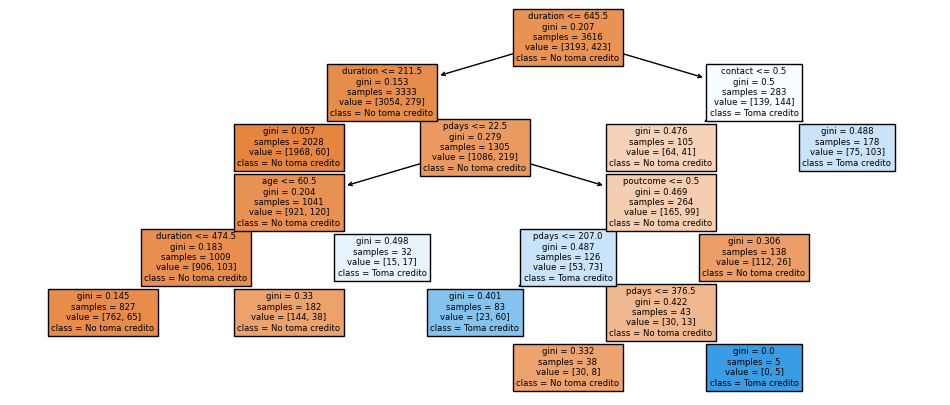

Rendimiento del árbol de decisión con 10 nodos: 0.90


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

#Paso 1: Dividimos el dataset en entrenamiento y prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Paso 2 = Crear el árbol de desicion
model = DecisionTreeClassifier(max_leaf_nodes= 10)

#Paso 3 = Ajuste del modelo
model.fit(X_train, y_train)

#Paso 4: Visualizar árbol de decisión
plt.figure(figsize=(12, 5))
plot_tree(model, feature_names=X.columns, class_names=['No toma credito', 'Toma credito'], filled=True)
plt.show()

#Paso 5: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#Paso 6: Evaluar el rendimiento del árbol de decisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del árbol de decisión con 10 nodos: {accuracy:.2f}')


Se probo realizar el modelo desde 10 hasta 30 nodos, y el accuracy sigue siendo del  0.9/1

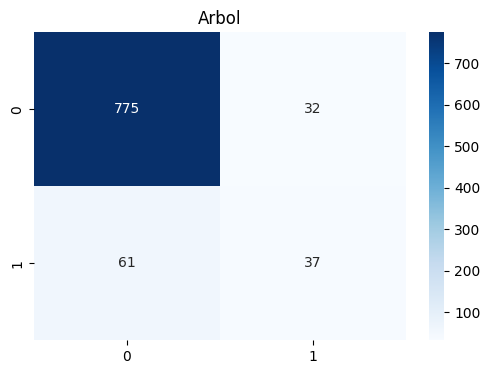

[[775  32]
 [ 61  37]]


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_arbol = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_arbol, annot=True, fmt='d', cmap='Blues')

plt.title('Arbol')
plt.show()

print(confusion_arbol)


#### II. Regresion logistica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# Paso 1: Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Crear el modelo de regresión logística
model = LogisticRegression()

# Paso 3: Ajustar el modelo
model.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Paso 5: Evaluar el rendimiento del modelo de regresión logística
accuracy = accuracy_score(y_test, y_pred)
print(f'Rendimiento del modelo de regresión logística: {accuracy:.2f}')


Rendimiento del modelo de regresión logística: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


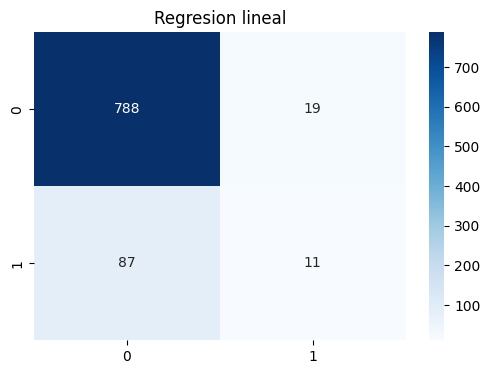

[[788  19]
 [ 87  11]]


In [ ]:
confusion_regresion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_regresion, annot=True, fmt='d', cmap='Blues')

plt.title('Regresion lineal')
plt.show()

print(confusion_regresion)

### Conlcusion de algoritmos

La matriz de confusion nos muestra que los positive-positive son ligeramete superiores. Por otro lado, los negativos-negativos son muy inferiores a los del arbol de decision. Por lo cual la presicion mas certera la encontraremos en el arbol de decision

## **8. Conclusiones**

Las variables estudiadas tienen una relacion directa al resultado de creditos otorgados. Ambos modelos tuvieron un 0.9 de rendimiento; pero el modelo de arbol de desicion tuvo una mayor cantidad de falsos negativos, superando ampliamente al de la regresion lineal. Los datos son congruentes con la Y, se puede predecir en un porcentaje cual es el perfil de persona que es mas probable que tome un credito en caso de que se analicen sus caracteristicas.
Sabemos además que las personas que buscan credito tienen que tener un nivel educativo base, ya que necesitara herramientas básicas para ser asesorado. Tambien identificamos que no existe relacion directa entre variables como el Balance, edad, trabajo, o periodo de campaña; aunque si, existe una relacion directa entre la efectivización de un credito y el tiempo de contacto; por lo cual, para que sea efectivo la toma de un credit necesitamos:
*  Un cliente potencial con un nivel de educación básico: el entendimiento de las normativas y los requisitos básicos para la toma de deuda, en caso de que no quede en una sesacion de pago.
*  Un ancla en el contacto: El mantener un contacto mas prolongado se relaciona directamente a la toma de credito, lo cual nos explica que un ancla es clave para el contacto al cliente.
*  La mayoria de los contactos son a aquellas personas que no estan endeudados, y en mayor proporcion, los que no tienen deuda.